# Data Preparation Google Fiber

## This notebook is for Data Cleaning and Feature Engineering

**==============================================================================================================**

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
#import squarify

import datetime
from datetime import datetime, timedelta, date, time


#import os
#import zipfile
import scipy
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from collections import Counter

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, Binarizer 
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, RobustScaler

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Feature-Engine library
import feature_engine

from feature_engine.imputation import AddMissingIndicator, CategoricalImputer, DropMissingData, MeanMedianImputer
from feature_engine.imputation import ArbitraryNumberImputer, RandomSampleImputer

from feature_engine.outliers import Winsorizer, ArbitraryOutlierCapper, OutlierTrimmer

from feature_engine.encoding import CountFrequencyEncoder, DecisionTreeEncoder, MeanEncoder, OneHotEncoder
from feature_engine.encoding import OrdinalEncoder, WoEEncoder, RareLabelEncoder

from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, ArbitraryDiscretiser
from feature_engine.discretisation import DecisionTreeDiscretiser, EqualWidthDiscretiser

from feature_engine.datetime import DatetimeFeatures

from feature_engine.creation import CyclicalFeatures, MathFeatures, RelativeFeatures


pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Data Quick Glance

In [2]:
df = pd.read_csv("googlefiber.csv", parse_dates=['date_created'])

In [3]:
df.head()

,date_created,contacts_n,contacts_n_1,contacts_n_2,contacts_n_3,contacts_n_4,contacts_n_5,contacts_n_6,contacts_n_7,new_type,new_market
0,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type_4,market_1
1,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type_3,market_2
2,2022-01-01,166.00,12.00,13.00,7.00,8.00,2.00,1.00,5.00,type_5,market_1
3,2022-01-01,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_1,market_2
4,2022-01-01,7.00,NaN,NaN,NaN,NaN,NaN,NaN,1.00,type_3,market_1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date_created  1350 non-null   datetime64[ns]
 1   contacts_n    1168 non-null   float64       
 2   contacts_n_1  892 non-null    float64       
 3   contacts_n_2  821 non-null    float64       
 4   contacts_n_3  778 non-null    float64       
 5   contacts_n_4  739 non-null    float64       
 6   contacts_n_5  719 non-null    float64       
 7   contacts_n_6  716 non-null    float64       
 8   contacts_n_7  733 non-null    float64       
 9   new_type      1350 non-null   object        
 10  new_market    1350 non-null   object        
dtypes: datetime64[ns](1), float64(8), object(2)
memory usage: 116.1+ KB


In [5]:
df.dtypes.value_counts()

float64           8
object            2
datetime64[ns]    1
dtype: int64

In [6]:
# Descriptive Statistical Analysis
df.describe(include="all")

,date_created,contacts_n,contacts_n_1,contacts_n_2,contacts_n_3,contacts_n_4,contacts_n_5,contacts_n_6,contacts_n_7,new_type,new_market
count,1350,1168.00,892.00,821.00,778.00,739.00,719.00,716.00,733.00,1350,1350
unique,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,3
top,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type_4,market_1
freq,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270,450
first,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-03-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,55.60,6.28,4.24,3.47,3.11,3.05,2.77,2.70,NaN,NaN
std,NaN,90.70,9.58,6.12,3.97,3.60,3.63,3.21,3.38,NaN,NaN
min,NaN,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN
25%,NaN,5.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,NaN,NaN


In [7]:
# Descriptive Statistical Analysis
df.describe(include=["int", "float"])

,contacts_n,contacts_n_1,contacts_n_2,contacts_n_3,contacts_n_4,contacts_n_5,contacts_n_6,contacts_n_7
count,1168.00,892.00,821.00,778.00,739.00,719.00,716.00,733.00
mean,55.60,6.28,4.24,3.47,3.11,3.05,2.77,2.70
std,90.70,9.58,6.12,3.97,3.60,3.63,3.21,3.38
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,5.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
50%,18.00,3.00,2.00,2.00,2.00,2.00,2.00,1.00
75%,40.00,8.00,6.00,5.00,4.00,4.00,4.00,4.00
max,599.00,138.00,108.00,21.00,27.00,24.00,20.00,28.00


In [8]:
# Descriptive Statistical Analysis
df.describe(include="object")

,new_type,new_market
count,1350,1350
unique,5,3
top,type_4,market_1
freq,270,450


In [9]:
df.columns

Index(['date_created', 'contacts_n', 'contacts_n_1', 'contacts_n_2', 'contacts_n_3', 'contacts_n_4', 'contacts_n_5', 'contacts_n_6', 'contacts_n_7', 'new_type', 'new_market'], dtype='object')

## Overall Visualization

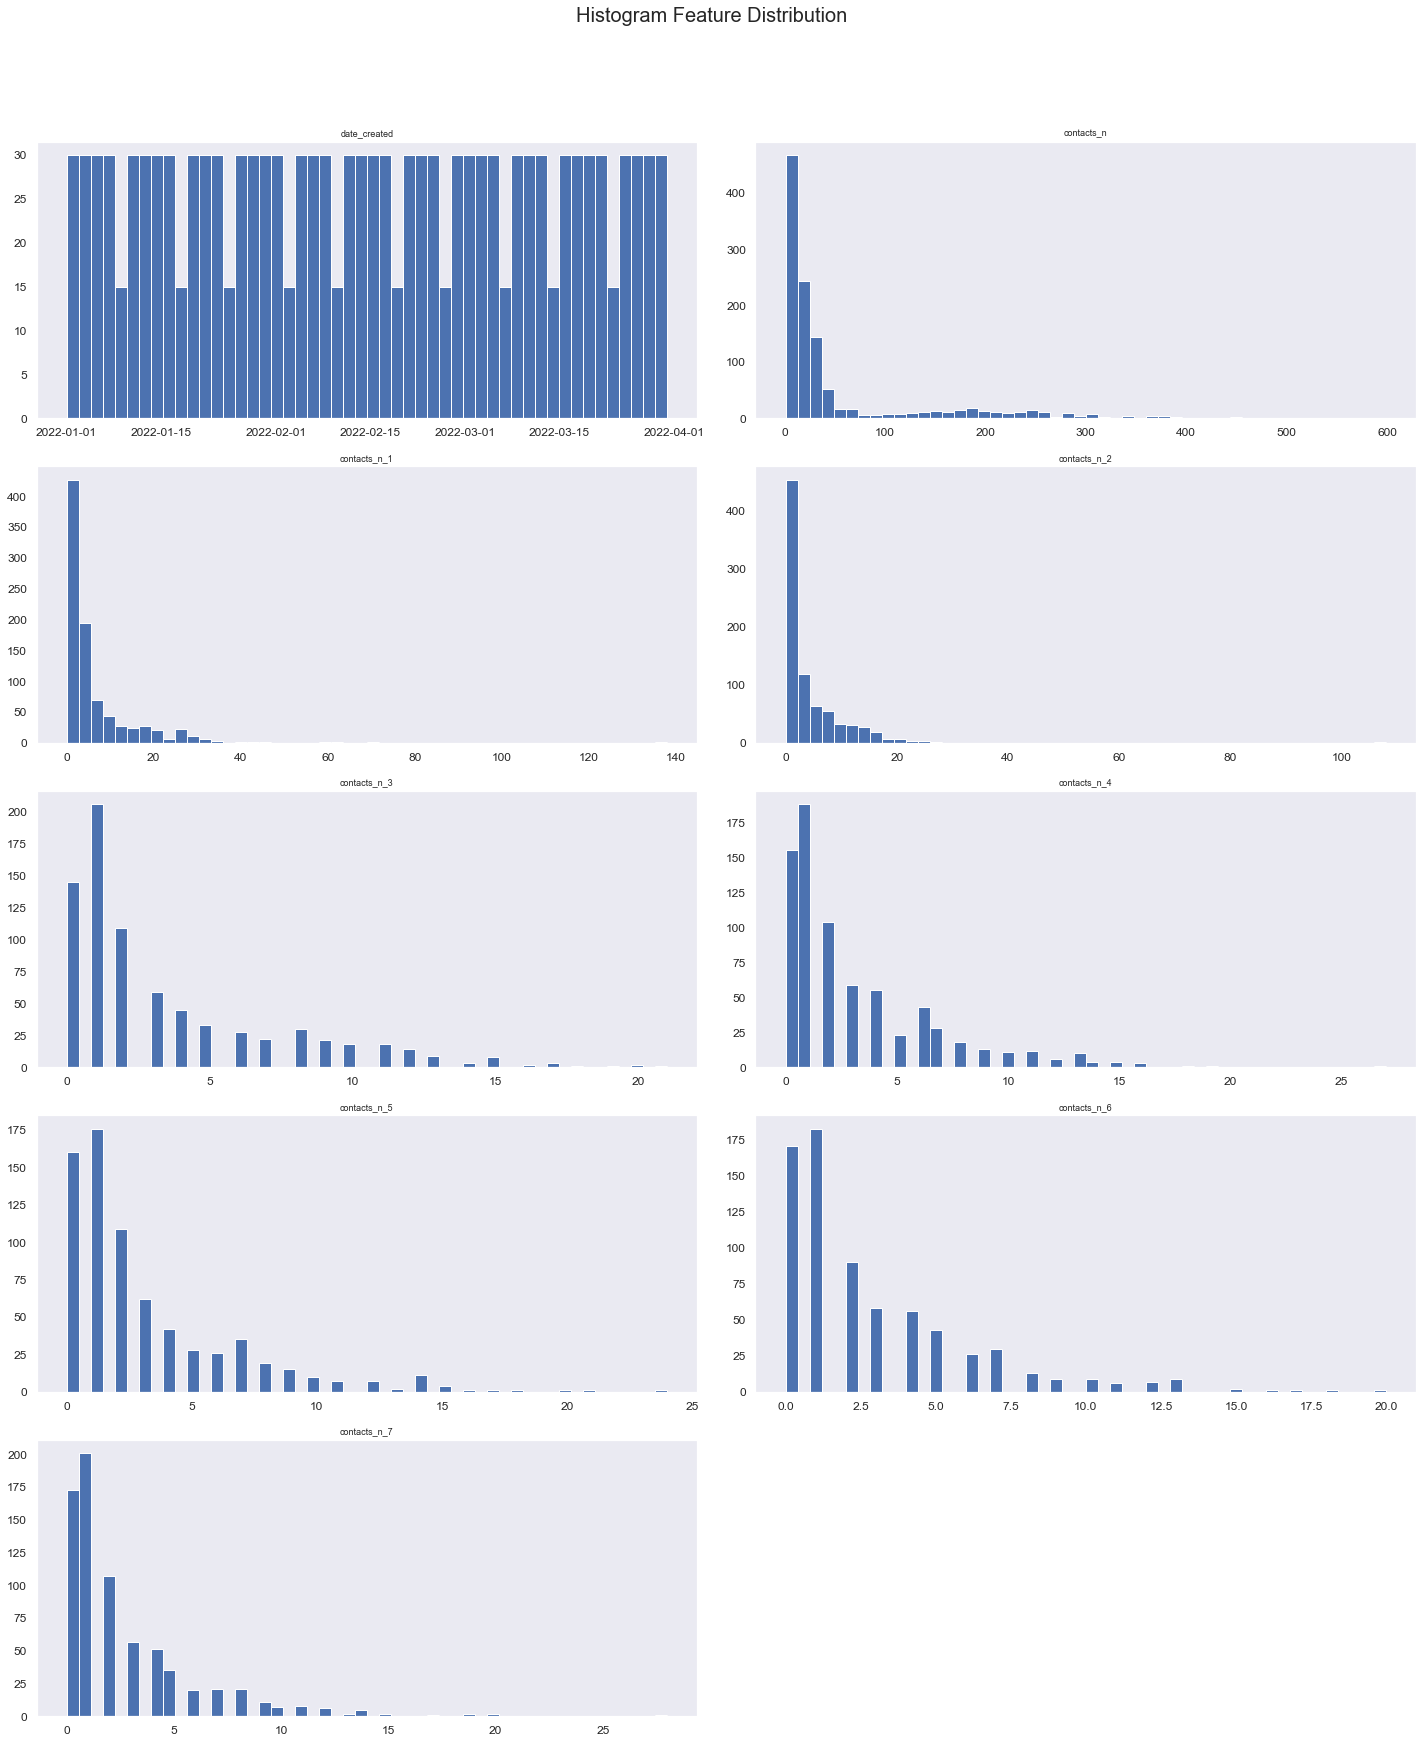

In [10]:
df.hist(bins=50, figsize=(20,50), layout=(len(df.columns),2), grid=False)
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

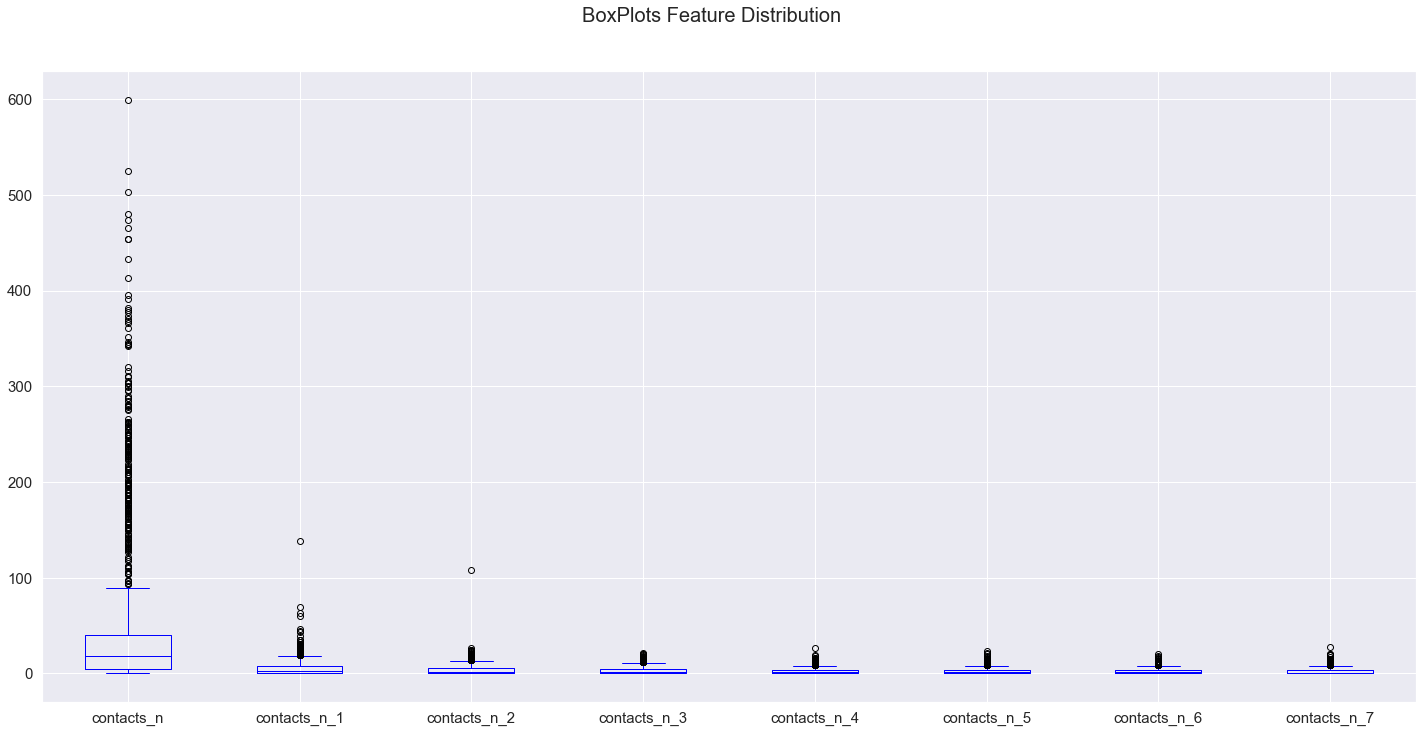

In [11]:
df.boxplot(figsize=(20,10), color='blue', fontsize=15)
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)

plt.tight_layout()
plt.show()

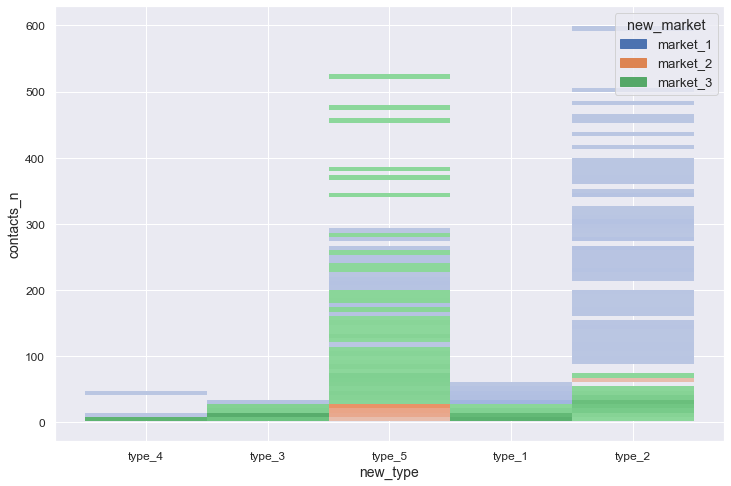

In [12]:
# Stacked Histogram

fig, ax = plt.subplots(figsize=(12,8))

sns.histplot(data=df, x="new_type", y="contacts_n", hue="new_market", multiple='dodge', stat='count')

plt.show()

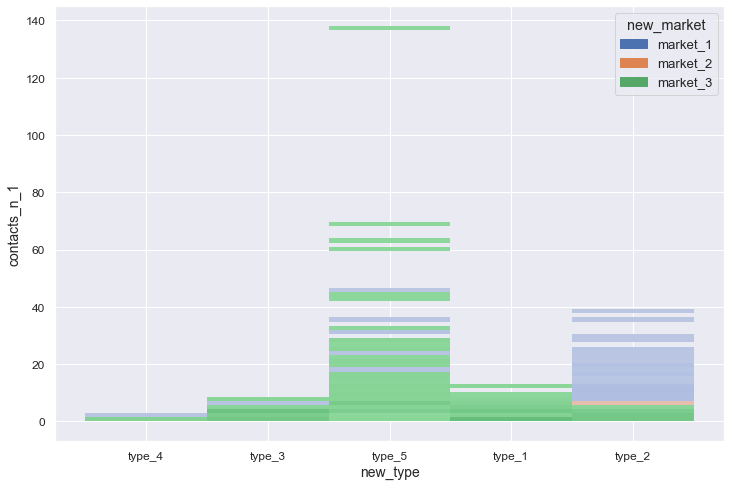

In [13]:
# Stacked Histogram

fig, ax = plt.subplots(figsize=(12,8))

sns.histplot(data=df, x="new_type", y="contacts_n_1", hue="new_market", multiple='dodge', stat='count')

plt.show()

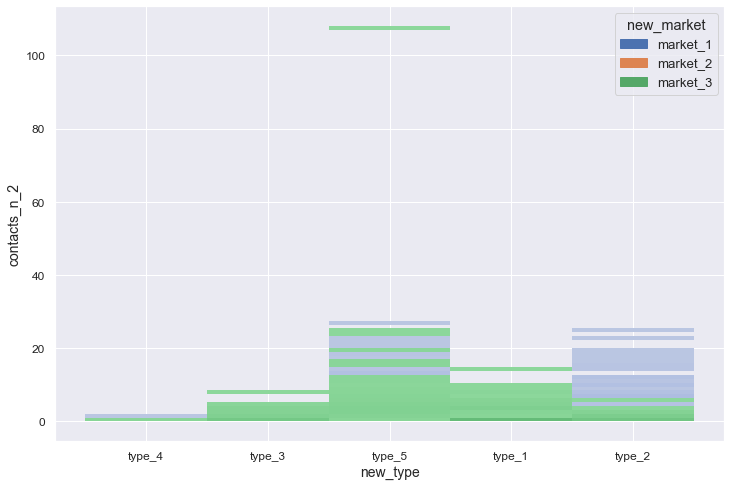

In [14]:
# Stacked Histogram

fig, ax = plt.subplots(figsize=(12,8))

sns.histplot(data=df, x="new_type", y="contacts_n_2", hue="new_market", multiple='dodge', stat='count')

plt.show()

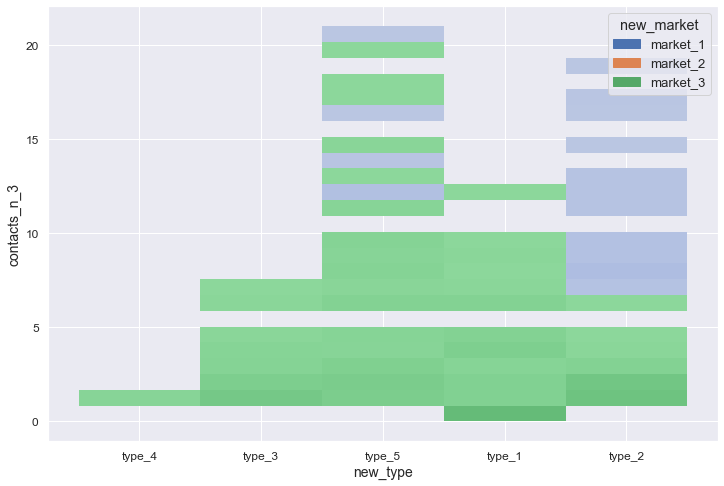

In [15]:
# Stacked Histogram

fig, ax = plt.subplots(figsize=(12,8))

sns.histplot(data=df, x="new_type", y="contacts_n_3", hue="new_market", multiple='dodge', stat='count')

plt.show()

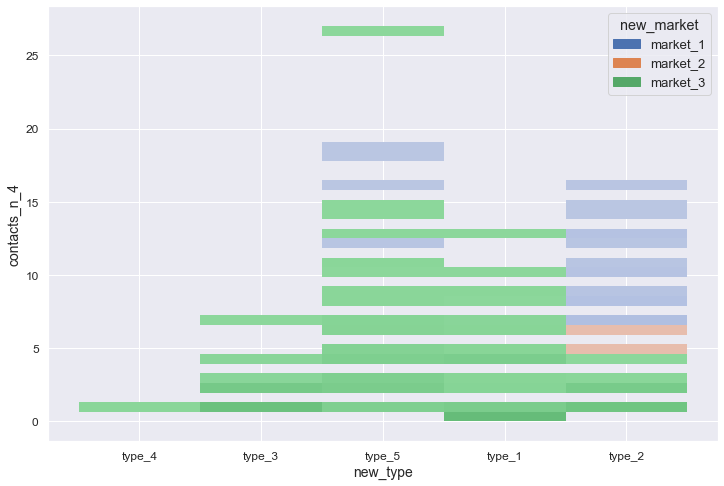

In [16]:
# Stacked Histogram

fig, ax = plt.subplots(figsize=(12,8))

sns.histplot(data=df, x="new_type", y="contacts_n_4", hue="new_market", multiple='dodge', stat='count')

plt.show()

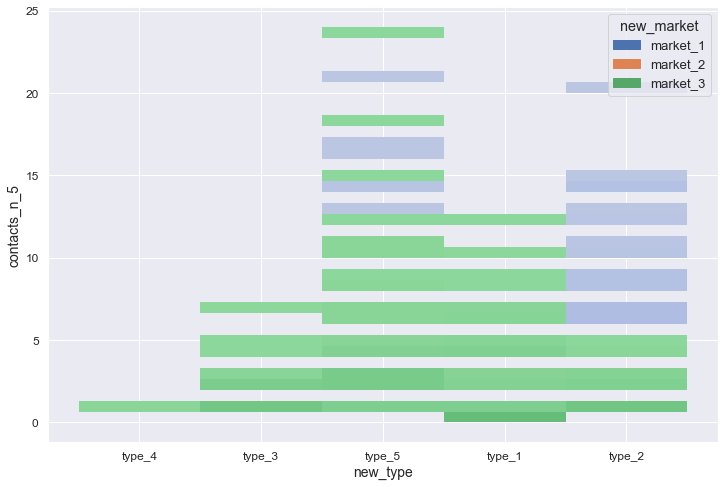

In [17]:
# Stacked Histogram

fig, ax = plt.subplots(figsize=(12,8))

sns.histplot(data=df, x="new_type", y="contacts_n_5", hue="new_market", multiple='dodge', stat='count')

plt.show()

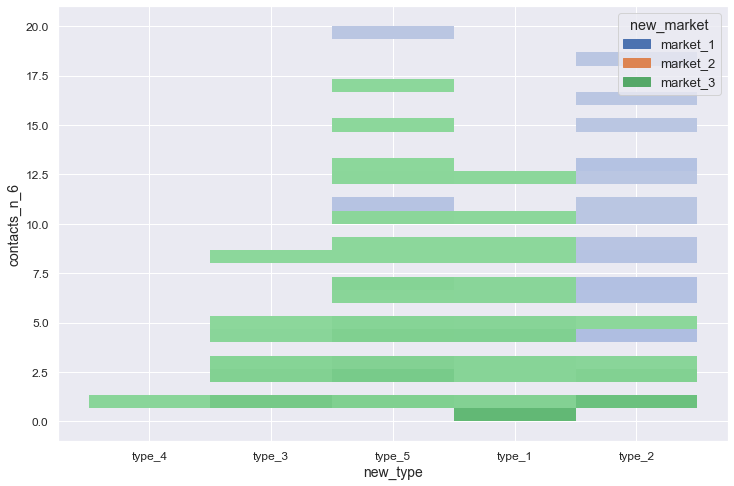

In [18]:
# Stacked Histogram

fig, ax = plt.subplots(figsize=(12,8))

sns.histplot(data=df, x="new_type", y="contacts_n_6", hue="new_market", multiple='dodge', stat='count')

plt.show()

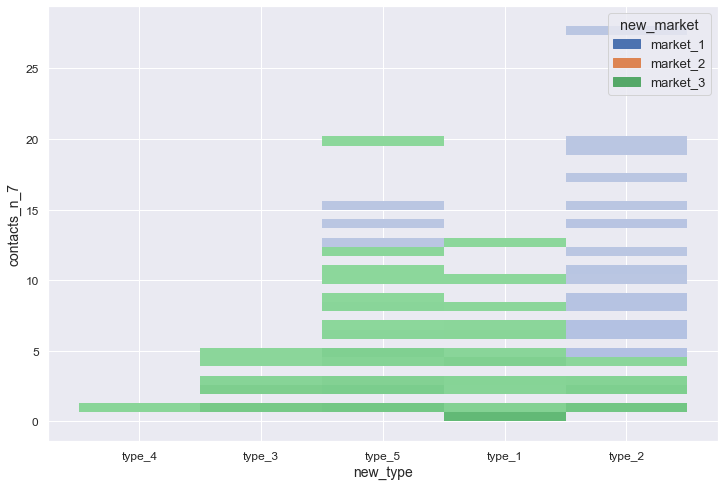

In [19]:
# Stacked Histogram

fig, ax = plt.subplots(figsize=(12,8))

sns.histplot(data=df, x="new_type", y="contacts_n_7", hue="new_market", multiple='dodge', stat='count')

plt.show()

**==============================================================================================================**

# Data Preprocessing

# Feature Engineering

  * **Feature selection**
    * Removing uninformative features
  * **Feature extraction**
    * Creating new features from existing features
  * **Feature transformation**
    * Modifying existing features to better suit our objectives
    * Encoding of categorical features as dummies
 
When modeling, best practice is to perform a rigorous examination of your data before beginning feature engineering and feature selection. This process is important. Not only does it help you understand your data, what it's telling you, and what it's _not_ telling you, but it also can give you clues that help you create new features. 

### Drop unwanted features (Based on Domain Knowledge)

In [20]:
df.head(5)

,date_created,contacts_n,contacts_n_1,contacts_n_2,contacts_n_3,contacts_n_4,contacts_n_5,contacts_n_6,contacts_n_7,new_type,new_market
0,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type_4,market_1
1,2022-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type_3,market_2
2,2022-01-01,166.00,12.00,13.00,7.00,8.00,2.00,1.00,5.00,type_5,market_1
3,2022-01-01,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_1,market_2
4,2022-01-01,7.00,NaN,NaN,NaN,NaN,NaN,NaN,1.00,type_3,market_1


In [21]:
df.columns

Index(['date_created', 'contacts_n', 'contacts_n_1', 'contacts_n_2', 'contacts_n_3', 'contacts_n_4', 'contacts_n_5', 'contacts_n_6', 'contacts_n_7', 'new_type', 'new_market'], dtype='object')

In [22]:
df["date_created"].min()

Timestamp('2022-01-01 00:00:00')

In [23]:
df["date_created"].max()

Timestamp('2022-03-31 00:00:00')

In [24]:
df.drop(['date_created'], axis=1, inplace=True)

In [25]:
df.head()

,contacts_n,contacts_n_1,contacts_n_2,contacts_n_3,contacts_n_4,contacts_n_5,contacts_n_6,contacts_n_7,new_type,new_market
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type_4,market_1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type_3,market_2
2,166.00,12.00,13.00,7.00,8.00,2.00,1.00,5.00,type_5,market_1
3,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_1,market_2
4,7.00,NaN,NaN,NaN,NaN,NaN,NaN,1.00,type_3,market_1


In [26]:
df.tail()

,contacts_n,contacts_n_1,contacts_n_2,contacts_n_3,contacts_n_4,contacts_n_5,contacts_n_6,contacts_n_7,new_type,new_market
1345,15.00,2.00,1.00,1.00,3.00,NaN,2.00,NaN,type_3,market_1
1346,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type_4,market_3
1347,33.00,2.00,5.00,0.00,3.00,3.00,1.00,0.00,type_1,market_1
1348,11.00,5.00,1.00,0.00,0.00,0.00,0.00,2.00,type_1,market_3
1349,391.00,11.00,5.00,10.00,15.00,8.00,6.00,3.00,type_2,market_1


In [27]:
#df.to_csv("googlefibermod.csv", index=False)

## Rename columns

In [28]:
df.columns

Index(['contacts_n', 'contacts_n_1', 'contacts_n_2', 'contacts_n_3', 'contacts_n_4', 'contacts_n_5', 'contacts_n_6', 'contacts_n_7', 'new_type', 'new_market'], dtype='object')

In [29]:
#Method 3: Using a new list of column names

# Creating a list of new columns
df_cols = ['contacts', 'contacts1', 'contacts2', 
           'contacts3', 'contacts4', 'contacts5', 
           'contacts6', 'contacts7', 
           'newtype', 'newmarket'
          ]

# printing the columns
# before renaming
print(df.columns)

# Renaming the columns
df.columns = df_cols

# printing the columns
# after renaming
print(df.columns)


Index(['contacts_n', 'contacts_n_1', 'contacts_n_2', 'contacts_n_3', 'contacts_n_4', 'contacts_n_5', 'contacts_n_6', 'contacts_n_7', 'new_type', 'new_market'], dtype='object')
Index(['contacts', 'contacts1', 'contacts2', 'contacts3', 'contacts4', 'contacts5', 'contacts6', 'contacts7', 'newtype', 'newmarket'], dtype='object')


In [30]:
df.head()

,contacts,contacts1,contacts2,contacts3,contacts4,contacts5,contacts6,contacts7,newtype,newmarket
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type_4,market_1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type_3,market_2
2,166.00,12.00,13.00,7.00,8.00,2.00,1.00,5.00,type_5,market_1
3,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_1,market_2
4,7.00,NaN,NaN,NaN,NaN,NaN,NaN,1.00,type_3,market_1


In [31]:
#df.to_csv("googlefibermod.csv", index=False)

**==============================================================================================================**

## Data Types

<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use:

<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>


In [32]:
df.dtypes

contacts     float64
contacts1    float64
contacts2    float64
contacts3    float64
contacts4    float64
contacts5    float64
contacts6    float64
contacts7    float64
newtype       object
newmarket     object
dtype: object

**==============================================================================================================**

## Treat Missing Values

<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>

For easier detection of missing values, pandas provides the `isna()`, `isnull()`, and `notna()` functions. For more information on pandas missing values please check out this documentation).

There are several options for dealing with missing values. We will use 'Lot Frontage' feature to analyze for missing values.

1. We can drop the missing values, using `dropna()` method.

2. We can drop the whole attribute (column), that contains missing values, using the `drop()` method.

3. We can replace the missing values (zero, the mean, the median, etc.), using `fillna()` method.

In [33]:
df.isnull().sum()

contacts     182
contacts1    458
contacts2    529
contacts3    572
contacts4    611
contacts5    631
contacts6    634
contacts7    617
newtype        0
newmarket      0
dtype: int64

In [34]:
pd.Series(df.isnull().sum()).sort_values()

newtype        0
newmarket      0
contacts     182
contacts1    458
contacts2    529
contacts3    572
contacts4    611
contacts7    617
contacts5    631
contacts6    634
dtype: int64

In [35]:
df.fillna(0.00, inplace=True)

In [36]:
df

,contacts,contacts1,contacts2,contacts3,contacts4,contacts5,contacts6,contacts7,newtype,newmarket
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_4,market_1
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_3,market_2
2,166.00,12.00,13.00,7.00,8.00,2.00,1.00,5.00,type_5,market_1
3,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_1,market_2
4,7.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,type_3,market_1
...,...,...,...,...,...,...,...,...,...,...
1345,15.00,2.00,1.00,1.00,3.00,0.00,2.00,0.00,type_3,market_1
1346,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_4,market_3
1347,33.00,2.00,5.00,0.00,3.00,3.00,1.00,0.00,type_1,market_1
1348,11.00,5.00,1.00,0.00,0.00,0.00,0.00,2.00,type_1,market_3


In [37]:
df.isnull().sum()

contacts     0
contacts1    0
contacts2    0
contacts3    0
contacts4    0
contacts5    0
contacts6    0
contacts7    0
newtype      0
newmarket    0
dtype: int64

In [38]:
#df.to_csv("googlefibermod.csv", index=False)

**==============================================================================================================**

## Treat Duplicate Values

In [39]:
df.duplicated(keep='first').sum()

310

In [40]:
#identify duplicate rows
duplicateRows = df[df.duplicated(keep='last')]

In [41]:
duplicateRows

,contacts,contacts1,contacts2,contacts3,contacts4,contacts5,contacts6,contacts7,newtype,newmarket
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_4,market_1
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_3,market_2
3,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_1,market_2
9,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_4,market_2
14,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_4,market_3
...,...,...,...,...,...,...,...,...,...,...
1301,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_4,market_2
1313,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_4,market_2
1319,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_4,market_1
1323,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_4,market_2


In [42]:
df.drop_duplicates(ignore_index=True, inplace=True)

In [43]:
df

,contacts,contacts1,contacts2,contacts3,contacts4,contacts5,contacts6,contacts7,newtype,newmarket
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_4,market_1
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_3,market_2
2,166.00,12.00,13.00,7.00,8.00,2.00,1.00,5.00,type_5,market_1
3,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_1,market_2
4,7.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,type_3,market_1
...,...,...,...,...,...,...,...,...,...,...
1035,235.00,21.00,15.00,8.00,19.00,6.00,8.00,11.00,type_5,market_1
1036,15.00,2.00,1.00,1.00,3.00,0.00,2.00,0.00,type_3,market_1
1037,33.00,2.00,5.00,0.00,3.00,3.00,1.00,0.00,type_1,market_1
1038,11.00,5.00,1.00,0.00,0.00,0.00,0.00,2.00,type_1,market_3


In [44]:
#df.to_csv("googlefibermod.csv", index=False)

# Feature extraction

Depending on your data, you may be able to create brand new features from your existing features. Oftentimes, features that you create yourself are some of the most important features selected by your model. Usually this is the case when you have both domain knowledge for the problem you're solving and the right combinations of data. 


In [45]:
df.columns

Index(['contacts', 'contacts1', 'contacts2', 'contacts3', 'contacts4', 'contacts5', 'contacts6', 'contacts7', 'newtype', 'newmarket'], dtype='object')

In [46]:
df["repeatcontacts"] = df['contacts1']+df['contacts2']+df['contacts3']+df['contacts4']+df['contacts5']

In [47]:
df.head()

,contacts,contacts1,contacts2,contacts3,contacts4,contacts5,contacts6,contacts7,newtype,newmarket,repeatcontacts
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_4,market_1,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_3,market_2,0.00
2,166.00,12.00,13.00,7.00,8.00,2.00,1.00,5.00,type_5,market_1,42.00
3,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_1,market_2,0.00
4,7.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,type_3,market_1,0.00


In [48]:
df["diff"] = df["contacts"] -df["repeatcontacts"]

In [49]:
df.head()

,contacts,contacts1,contacts2,contacts3,contacts4,contacts5,contacts6,contacts7,newtype,newmarket,repeatcontacts,diff
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_4,market_1,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_3,market_2,0.00,0.00
2,166.00,12.00,13.00,7.00,8.00,2.00,1.00,5.00,type_5,market_1,42.00,124.00
3,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,type_1,market_2,0.00,2.00
4,7.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,type_3,market_1,0.00,7.00


In [50]:
--------------

SyntaxError: invalid syntax (3984577744.py, line 1)

**==============================================================================================================**

**==============================================================================================================**

## Treat Outliers

In statistics, an outlier is an observation point that is distant from other observations. An outlier can be due to some mistakes in data collection or recording, or due to natural high variability of data points. How to treat an outlier highly depends on our data or the type of analysis to be performed. Outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

There are many ways to discover outliers in our data. We can do Uni-variate analysis (using one variable analysis) or Multi-variate analysis (using two or more variables). One of the simplest ways to detect an outlier is to inspect the data visually, by making box plots or scatter plots. 

In [ ]:
df.columns

In [ ]:
df.describe()

In [ ]:
# Draw Box Plots

plt.figure(figsize=(20,7))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="contacts", data=df, orient="h")
#plt.xlim(0, 3600)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="contacts1", orient="h", data=df)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df.contacts2, orient="h")
plt.xlim(0, 100)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df.contacts3, orient="h")
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df.contacts4, orient="h")
plt.show()

## Capping / Censoring outliers

The Winsorizer() caps maximum and / or minimum values of a variable.

The Winsorizer() works only with numerical variables

In [ ]:
df.columns

In [ ]:
capper = Winsorizer(
    variables=['contacts', 'contacts1', 'contacts2', 'contacts3', 'contacts4', 'contacts5', 'contacts6', 'contacts7'],
    capping_method="iqr",
    tail="right",
    fold=1.5,
)


In [ ]:
capper.fit(df)

In [ ]:
capper.left_tail_caps_

In [ ]:
capper.right_tail_caps_

In [ ]:
df2 = capper.transform(df)

In [ ]:
df2.describe()

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df2.starting, orient="h")
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df2.hours, orient="h")
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df2.hours, orient="h")
plt.show()

In [ ]:
#df2.to_csv("wellnessmod.csv", index=False)

**==============================================================================================================**

**==============================================================================================================**

## One-hot encoding

There are three unique values: France, Spain, and Germany. Let's encode this data so it can be represented using Boolean features. We'll use a pandas function called `pd.get_dummies()` to do this.

When we call `pd.get_dummies()` on this feature, it will replace the `Geography` column with three new Boolean columns--one for each possible category contained in the column being dummied. 

When we specify `drop_first=True` in the function call, it means that instead of replacing `Geography` with three new columns, it will instead replace it with two columns. We can do this because no information is lost from this, but the dataset is shorter and simpler.  

In this case, we end up with two new columns called `Geography_Germany` and `Geography_Spain`. We don't need a `Geography_France` column. Why not? Because if a customer's values in `Geography_Germany` and `Geography_Spain` are both 0, we'll know they're from France! 

In [ ]:
df.info()

In [ ]:
df.describe(include="object")

In [ ]:
list(df.describe(include="object"))

In [ ]:
df["verifiedstatus"].value_counts().to_frame()

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.extra, y=df.duration, data=df, ci=None, estimator=mean)
plt.title("")
plt.show()

In [ ]:
df["major"].value_counts().to_frame()

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.mtatax, y=df.duration, data=df, ci=None, estimator=mean)
plt.title("")
plt.show()

In [ ]:
df["tollsamount"].value_counts().to_frame()

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.tollsamount, y=df.duration, data=df, ci=None, estimator=mean)
plt.title("")
plt.show()

In [ ]:
df["improvementsurcharge"].value_counts().to_frame()

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=df.improvementsurcharge, y=df.duration, data=df, ci=None, estimator=mean)
plt.title("")
plt.show()

In [ ]:
df["pulocationid"].value_counts().to_frame().head(10)

In [ ]:
df["dolocationid"].value_counts().to_frame().head(10)

In [ ]:
# Method 1: Separate the categorical
df.columns

In [ ]:
df_cat = df[['Bldg Type', 'House Style']]

In [ ]:
df_cat

In [ ]:
df_cat = pd.get_dummies(data=df_cat, drop_first=True, prefix=None)

In [ ]:
df_cat

In [ ]:
df2 = pd.concat([df,df_cat], axis=1)

In [ ]:
df2

In [ ]:
df2.drop(['Bldg Type', 'House Style'], axis=1, inplace=True)

In [ ]:
#df.to_csv(".csv", index=False)

In [ ]:
# Method 2: Use pandas dummies
df.columns

In [ ]:
list(df.select_dtypes(['object']).columns)

In [ ]:
list(df.select_dtypes(['bool']).columns)

In [ ]:
df2 = pd.get_dummies(df, prefix=['vendorid'], 
                     columns = ['vendorid'], drop_first=True)

In [ ]:
df2.head()

In [ ]:
#df2.to_csv("nyctaximod.csv", index=False)

In [ ]:
# Method 3: One-hot encode the categorical variables as needed and save resulting dataframe in a new variable
df2 = pd.get_dummies(df, prefix=['cycle', 'gear'], columns = ['cyl', 'gear'], drop_first=False)

# Display the new dataframe
df2.head()

In [ ]:
df2 = pd.concat([df,df_cat], axis=1)

In [ ]:
df2

## One Hot Encoding - Feature-engine

Just like imputation, all methods of categorical encoding should be performed over the training set, and then propagated to the test set. 

Why? 

Because these methods will "learn" patterns from the train data, and therefore you want to avoid leaking information and overfitting. But more importantly, because we don't know whether in future / live data, we will have all the categories present in the train data, or if there will be more or less categories. Therefore, we want to anticipate this uncertainty by setting the right processes right from the start. We want to create transformers that learn the categories from the train set, and used those learned categories to create the dummy variables in both train and test sets.

In [ ]:
df.columns

In [ ]:
df.describe(include="object")

In [ ]:
list(df.describe(include="object"))

In [ ]:
# set up encoder

encoder = OneHotEncoder(
    variables=['landsurfacecondition',
 'foundationtype',
 'rooftype',
 'groundfloortype',
 'otherfloortype',
 'position',
 'planconfiguration',
 'legalownershipstatus'],  # alternatively pass a list of variables
    drop_last=True,  # to return k-1, use drop=false to return k dummies
)

In [ ]:
# fit the encoder (finds categories)

encoder.fit(df)

In [ ]:
# automatically found numerical variables

encoder.variables_

In [ ]:
# we observe the learned categories

encoder.encoder_dict_

In [ ]:
# transform the data sets

df2 = encoder.transform(df)

In [ ]:
df2.head()

In [ ]:
# we can retrieve the feature names as follows:

encoder.get_feature_names_out()

In [ ]:
df2.head()

In [ ]:
#df2.to_csv("earthquakemod.csv", index=False)

## Ordinal Encoding - Feature-engine

Ordinal encoding consist in replacing the categories by integers from 1 to n (or 0 to n-1, depending the implementation), where n is the number of distinct categories of the variable.

The numbers are assigned arbitrarily. This encoding method allows for quick benchmarking of machine learning models. It is also suitable for tree based machine learning algorithms.


In [ ]:
# let's explore the unique categories
df["color"].unique()

In [ ]:
ordinal_enc = OrdinalEncoder(
    encoding_method="arbitrary",
    variables=["color"],
)


In [ ]:
ordinal_enc.fit(df)

In [ ]:
# in the encoder dict we can observe the numbers
# assigned to each category for all the indicated variables

ordinal_enc.encoder_dict_

In [ ]:
# this is the list of variables that the encoder will transform

ordinal_enc.variables_

In [ ]:
df2 = ordinal_enc.transform(df)

In [ ]:
df2.head()

In [ ]:
#df2.to_csv("earthquakemod.csv", index=False)

## Count or frequency encoding - Feature-engine

In count encoding we replace the categories by the count of the observations that show that category in the dataset. Similarly, we can replace the category by the frequency -or percentage- of observations in the dataset. That is, if 10 of our 100 observations show the colour blue, we would replace blue by 10 if doing count encoding, or by 0.1 if replacing by the frequency. These techniques capture the representation of each label in a dataset, but the encoding may not necessarily be predictive of the outcome. These are however, very popular encoding methods in Kaggle competitions.

The assumption of this technique is that the number observations shown by each variable is somewhat informative of the predictive power of the category.


In [ ]:
# let's explore the unique categories
df["color"].unique()

In [ ]:
count_enc = CountFrequencyEncoder(
    encoding_method="count",  # to do frequency ==> encoding_method='frequency'
    variables=["color"]
)

In [ ]:
count_enc.fit(df)

In [ ]:
# in the encoder dict we can observe the number of
# observations per category for each variable

count_enc.encoder_dict_

In [ ]:
df2 = count_enc.transform(df)

In [ ]:
df2.head()

In [ ]:
#df2.to_csv("earthquakemod.csv", index=False)

## Ordered Integer Encoding

Ordering the categories according to the target means assigning a number to the category from 1 to k, where k is the number of distinct categories in the variable, but this numbering is informed by the mean of the target for each category.

**Note**

If the argument `variables` is left to None, then the encoder will automatically identify all categorical variables. Is that not sweet?

The encoder will not encode numerical variables. So if some of your numerical variables are in fact categories, you will need to re-cast them as object before using the encoder.

Finally, if there is a label in the test set that was not present in the train set, the encoder will through and error, to alert you of this behaviour.

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    df[["color"]],  # predictors
    df["price"],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0,
)  # seed to ensure reproducibility

In [ ]:
ordinal_enc = OrdinalEncoder(
    # NOTE that we indicate ordered in the encoding_method, otherwise it assings numbers arbitrarily
    encoding_method="ordered",
    variables=["color"],
)

In [ ]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

ordinal_enc.fit(X_train, y_train)

In [ ]:
# in the encoder dict we can observe each of the top categories
# selected for each of the variables

ordinal_enc.encoder_dict_

In [ ]:
# this is the list of variables that the encoder will transform

ordinal_enc.variables_

In [ ]:
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

In [ ]:
# let's explore the result
X_train.head()

## Mean Encoding or Target Encoding

Mean encoding implies replacing the category by the average target value for that category. For example, if we have the variable city, with categories London, Manchester and Bristol, and we want to predict the default rate, if the default rate for London is 30% we replace London by 0.3, if the default rate for Manchester is 20% we replace Manchester by 0.2 and so on.

If using Feature-Engine, instead of pandas, we do not need to keep the target variable in the training dataset.

In [ ]:
df.dtypes[df.dtypes == 'object']

In [ ]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    df[["cut", "color", "clarity"]],
    df["price"],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0,
)  # seed to ensure reproducibility


In [ ]:
X_train.shape, X_test.shape

In [ ]:
mean_enc = MeanEncoder(variables=["cut", "color", "clarity"], smoothing="auto")

In [ ]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class

mean_enc.fit(X_train, y_train)

In [ ]:
# in the encoder dict we see the target mean assigned to each
# category for each of the selected variables

mean_enc.encoder_dict_

In [ ]:
# this is the list of variables that the encoder will transform

mean_enc.variables_

In [ ]:
X_train = mean_enc.transform(X_train)
X_test = mean_enc.transform(X_test)

In [ ]:
# let's explore the result
X_train.head()

## Weight  of evidence

Weight of Evidence (WoE) was developed primarily for the credit and financial industries to help build more predictive models to evaluate the risk of loan default. That is, to predict how likely the money lent to a person or institution is to be lost. Thus, Weight of Evidence is a measure of the "strength” of a grouping technique to separate good and bad risk (default). 

- WoE will be 0 if the P(Goods) / P(Bads) = 1, that is, if the outcome is random for that group.
- If P(Bads) > P(Goods) the odds ratio will be < 1 and,
- WoE will be < 0 if,  P(Goods) > P(Bads).

WoE is well suited for Logistic Regression, because the Logit transformation is simply the log of the odds, i.e., ln(P(Goods)/P(Bads)). Therefore, by using WoE-coded predictors in logistic regression, the predictors are all prepared and coded to the same scale, and the parameters in the linear logistic regression equation can be directly compared.

The WoE transformation has three advantages:

- It creates a monotonic relationship between the target and the independent variables.
- It orders the categories on a "logistic" scale which is natural for logistic regression
- The transformed variables can then be compared because they are on the same scale. Therefore, it is possible to determine which one is more predictive.

The WoE also has a limitation:

- Prone to cause over-fitting

**==============================================================================================================**

## One Hot Encoding of Frequent Categories

We learned in Section 4 that high cardinality and rare labels may result in certain categories appearing only in the train set, therefore causing over-fitting, or only in the test set, and then our models wouldn't know how to score those observations.

We also learned in the previous lecture on one hot encoding, that if categorical variables contain multiple labels, then by re-encoding them with dummy variables we will expand the feature space dramatically.

**In order to avoid these complications, we can create dummy variables only for the most frequent categories**

This procedure is also called one hot encoding of top categories.

### Advantages of OHE of top categories

- Straightforward to implement
- Does not require hrs of variable exploration
- Does not expand massively the feature space
- Suitable for linear models


### Limitations

- Does not add any information that may make the variable more predictive
- Does not keep the information of the ignored labels


Often, categorical variables show a few dominating categories while the remaining labels add little information. Therefore, OHE of top categories is a simple and useful technique.

### Note

The number of top variables is set arbitrarily. In the KDD competition the authors selected 10, but it could have been 15 or 5 as well. This number can be chosen arbitrarily or derived from data exploration.


## OHE with pandas and NumPy

In [ ]:
df[["cut", "color", "clarity"]]

In [ ]:
# let's explore the unique categories
df["cut"].unique()

In [ ]:
# let's find the top 10 most frequent categories for the variable 'Neighborhood'

df["cut"].value_counts().sort_values(ascending=False).head(10)

In [ ]:
# let's explore the unique categories
df["color"].unique()

In [ ]:
# let's find the top 10 most frequent categories for the variable 'Neighborhood'

df["color"].value_counts().sort_values(ascending=False).head(10)

In [ ]:
# let's explore the unique categories
df["clarity"].unique()

In [ ]:
# let's find the top 10 most frequent categories for the variable 'Neighborhood'

df["clarity"].value_counts().sort_values(ascending=False).head(10)

In [ ]:
df2 = pd.get_dummies(df, prefix=['cut'], 
                     columns = ['cut'], drop_first=True)

In [ ]:
#df2.to_csv("earthquakemod.csv", index=False)

## One hot encoding of top categories with Feature-Engine

In [ ]:
df.info()

In [ ]:
df.describe(include="object")

In [ ]:
list(df.describe(include="object"))

In [ ]:
df["cut"].value_counts().to_frame()

In [ ]:
df["color"].value_counts().to_frame()

In [ ]:
df["clarity"].value_counts().to_frame()

In [ ]:
df["vendorid"].value_counts().to_frame()

In [ ]:
df["pulocationid"].value_counts().to_frame().head(5)

In [ ]:
df["dolocationid"].value_counts().to_frame().head(5)

In [ ]:
df["paymenttype"].value_counts().to_frame()

In [ ]:
ohe_enc = OneHotEncoder(
    top_categories=5,  # you can change this value to select more or less variables
    # we can select which variables to encode
    variables=["dolocationid"],
    drop_last=False,
)


In [ ]:
ohe_enc.fit(df)

In [ ]:
# in the encoder dict we can observe each of the top categories
# selected for each of the variables

ohe_enc.encoder_dict_

In [ ]:
# this is the list of variables that the encoder will transform

ohe_enc.variables_

In [ ]:
df2 = ohe_enc.transform(df)

In [ ]:
df2

In [ ]:
df["dolocationid"].value_counts().to_frame()

In [ ]:
df2["pulocationid_237"].value_counts()

In [ ]:
df2["paymenttype_2"].value_counts()

In [ ]:
#df2.to_csv("nyctaximod.csv", index=False)

**==============================================================================================================**

## Engineering Rare Categories

Rare values are categories within a categorical variable that are present only in a small percentage of the observations. There is no rule of thumb to determine how small is a small percentage, but typically, any value below 5 % can be considered rare.

As we discussed in section 3 of the course, Infrequent labels are so few, that it is hard to derive reliable information from them. But more importantly, if you remember from section 3, infrequent labels tend to appear only on train set or only on the test set:

- If only on the train set, they may cause over-fitting
- If only on the test set, our machine learning model will not know how to score them

Therefore, to avoid this behaviour, we tend to group those into a new category called 'Rare' or 'Other'.

Rare labels can appear in low or highly cardinal variables. There is no rule of thumb to determine how many different labels are considered high cardinality. It depend as well on how many observations there are in the dataset. In a dataset with 1,000 observations, 100 labels may seem a lot, whereas in a dataset with 100,000 observations it may not be so high.

Highly cardinal variables tend to have many infrequent or rare categories, whereas low cardinal variables, may have only 1 or 2 rare labels.

### Note the following:

**Note that grouping infrequent labels or categories under a new category called 'Rare' or 'Other' is the common practice in machine learning for business.**

- Grouping categories into rare for variables that show low cardinality may or may not improve model performance, however, we tend to re-group them into a new category to smooth model deployment.

- Grouping categories into rare for variables with high cardinality, tends to improve model performance as well.

In [ ]:
df.columns

In [ ]:
list(df.select_dtypes("object"))

In [ ]:
def find_non_rare_labels(df, variable, tolerance):

    temp = df.groupby([variable])[variable].count() / len(df)

    non_rare = [x for x in temp.loc[temp > tolerance].index.values]

    return non_rare

In [ ]:
# non rare labels (min 5%)
find_non_rare_labels(df, "planconfiguration", 0.25)

In [ ]:
df["planconfiguration"].value_counts().to_frame()

In [ ]:
# non rare labels (min 5%)
find_non_rare_labels(df, "legalownershipstatus", 0.25)

In [ ]:
df["legalownershipstatus"].value_counts().to_frame()

In [ ]:
# non rare labels (min 5%)
find_non_rare_labels(df, "position", 0.25)

In [ ]:
df["position"].value_counts().to_frame()

## Encoding Rare Labels with Feature-Engine

In [ ]:
# Rare value encoder
rare_encoder = RareLabelEncoder(
    tol=0.25,  # minimal percentage to be considered non-rare
    n_categories=2,  # minimal number of categories the variable should have to re-group rare categories
    variables=['planconfiguration',
 'legalownershipstatus'],  # variables to re-group
)

In [ ]:
# Rare value encoder
rare_encoder = RareLabelEncoder(
    tol=0.05,  # minimal percentage to be considered non-rare
    n_categories=2,  # minimal number of categories the variable should have to re-cgroup rare categories
    variables=[ "land_surface_condition" ],  # variables to re-group
)

In [ ]:
rare_encoder.fit(df)

In [ ]:
rare_encoder.variables_

In [ ]:
# the encoder_dict_ is a dictionary of variable: frequent labels pair
rare_encoder.encoder_dict_

In [ ]:
df2 = rare_encoder.transform(df)

In [ ]:
df2.head()

In [ ]:
df2[['planconfiguration',
 'legalownershipstatus']].apply(pd.Series.value_counts)

In [ ]:
#df2.to_csv("earthquakemod.csv", index=False)

**==============================================================================================================**

**==============================================================================================================**

**==============================================================================================================**

**=============================================================================================================**

**==============================================================================================================**

**==============================================================================================================**

**==============================================================================================================**

**==============================================================================================================**

# Feature Scaling

## Data Standardization
<p>
Data is usually collected from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.)
</p>

### What is standardization?

Standardisation involves centering the variable at zero, and standardising the variance to 1. The procedure involves subtracting the mean of each observation and then dividing by the standard deviation:

**z = (x - x_mean) /  std**

The result of the above transformation is **z**, which is called the z-score, and represents how many standard deviations a given observation deviates from the mean. A z-score specifies the location of the observation within a distribution (in numbers of standard deviations respect to the mean of the distribution). The sign of the z-score (+ or - ) indicates whether the observation is above (+) or below ( - ) the mean.

The shape of a standardised (or z-scored normalised) distribution will be identical to the original distribution of the variable. If the original distribution is normal, then the standardised distribution will be normal. But, if the original distribution is skewed, then the standardised distribution of the variable will also be skewed. In other words, **standardising a variable does not normalize the distribution of the data** and if this is the desired outcome, we should implement any of the techniques discussed in section 7 of the course.

In a nutshell, standardisation:

- centers the mean at 0
- scales the variance at 1
- preserves the shape of the original distribution
- the minimum and maximum values of the different variables may vary
- preserves outliers

Good for algorithms that require features centered at zero.

### Feature magnitude matters because:

- The regression coefficients of linear models are directly influenced by the scale of the variable.
- Variables with bigger magnitude / larger value range dominate over those with smaller magnitude / value range
- Gradient descent converges faster when features are on similar scales
- Feature scaling helps decrease the time to find support vectors for SVMs
- Euclidean distances are sensitive to feature magnitude.
- Some algorithms, like PCA require the features to be centered at 0.


### The machine learning models affected by the feature scale are:

- Linear and Logistic Regression
- Neural Networks
- Support Vector Machines
- KNN
- K-means clustering
- Linear Discriminant Analysis (LDA)
- Principal Component Analysis (PCA)


**Feature scaling** refers to the methods or techniques used to normalize the range of independent variables in our data, or in other words, the methods to set the feature value range within a similar scale. Feature scaling is generally the last step in the data preprocessing pipeline, performed **just before training the machine learning algorithms**.

There are several Feature Scaling techniques, which we will discuss throughout this section:

- Standardisation
- Mean normalisation
- Scaling to minimum and maximum values - MinMaxScaling
- Scaling to maximum value - MaxAbsScaling
- Scaling to quantiles and median - RobustScaling
- Normalization to vector unit length

| Name | Sklearn_class |
|-------------|------------|
|Standard scaler | Standard scaler | 
|MinMaxScaler    | MinMax Scaler   |
|MaxAbs Scaler   | MaxAbs Scaler   |
|Robust scaler   | Robust scaler   |
|Quantile Transformer_Normal | Quantile Transformer(output_distribution ='normal')|
|Quantile Transformer_Uniform| Quantile Transformer(output_distribution = 'uniform')|
|PowerTransformer-Yeo-Johnson| PowerTransformer(method = 'yeo-johnson')|
|Normalizer | Normalizer|

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
X = df.iloc[:, 0:7]
y = df.iloc[:, 7]

In [ ]:
X.values, y.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()

In [ ]:
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

In [ ]:
# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

In [ ]:
X_test_scaled

In [ ]:
combined = np.concatenate((X_train_scaled, X_test_scaled), axis=0)
combined

In [ ]:
X_scaled = pd.DataFrame(combined, columns=X.columns)

In [ ]:
X_scaled

In [ ]:
X_scaled.describe()

In [ ]:
X_remain = df.iloc[:, 7:]
X_remain

In [ ]:
df2 = pd.concat([X_scaled, X_remain],axis=1)

In [ ]:
df2

In [ ]:
#df2.to_csv("wellnessmod.csv", index=False)

### Merging all data

In [ ]:
df

In [ ]:
df.columns

In [ ]:
df.drop(['lotarea', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 
         '1stflrsf', '2ndflrsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 
         'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd', 'fireplaces', 
         'garagecars', 'garagearea', 'years', 'saleprice'], axis=1, inplace=True)

In [ ]:
df

In [ ]:
df3 = pd.concat([df,df2], axis=1)

In [ ]:
df3

In [ ]:
#df3.to_csv("ameshousingmod.csv", index=False)

## Scaling to Minimum and Maximum values - MinMaxScaling

Minimum and maximum scaling squeezes the values between 0 and 1. It subtracts the minimum value from all the observations, and then divides it by the value range:

X_scaled = (X - X.min / (X.max - X.min)


The result of the above transformation is a distribution which values vary within the range of 0 to 1. But the mean is not centered at zero and the standard deviation varies across variables. The shape of a min-max scaled distribution will be similar to the original variable. This scaling technique is also sensitive to outliers.

In a nutshell, MinMaxScaling:

- the minimum and maximum values are 0 and 1.
- does not center the mean at 0
- variance varies across variables
- sensitive outliers

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
X = df.iloc[:, 16:21]
y = df.iloc[:, 21:]

In [ ]:
X.values, y.values

In [ ]:
# set up the scaler
minmax = MinMaxScaler()

In [ ]:
# fit the scaler to the train set, it will learn the parameters
minmax.fit(X)

In [ ]:
# transform train and test sets
X_scaled = minmax.transform(X)

In [ ]:
X_scaled[0:5]

In [ ]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
X_scaled

In [ ]:
X_scaled.describe()

In [ ]:
df2 = pd.concat([X_scaled,y], axis=1)

In [ ]:
df2

In [ ]:
df

In [ ]:
df.columns

In [ ]:
df.drop(['carsowned', 'children', 'totalchildren', 'income', 'age', 'buyer'], axis=1, inplace=True)

In [ ]:
df

In [ ]:
df3 = pd.concat([df,df2], axis=1)

In [ ]:
df3

In [ ]:
#df3.to_csv("bicycleclassific.csv", index=False)

## Mean Normalisation


Mean normalisation involves centering the variable at zero, and re-scaling to the value range. The procedure involves subtracting the mean of each observation and then dividing by difference between the minimum and maximum value:

**x_scaled = (x - x_mean) / ( x_max - x_min)**


The result of the above transformation is a distribution that is centered at 0, and its minimum and maximum values are within the range of -1 to 1. The shape of a mean normalised distribution will be similar to the original distribution.

In a nutshell, mean normalisation:

- centers the mean at 0
- variance will be different
- the minimum and maximum values are squeezed between -1 and 1
- preserves outliers

Good for algorithms that require features centered at zero.


## Scaling to maximum value - MaxAbsScaling

Maximum absolute scaling scales the data to its absolute maximum value:

X_scaled = X / abs(X.max)

The result of the above transformation is a distribution which values vary within the range of -1 to 1. But the mean is not centered at zero and the standard deviation varies across variables.

Scikit-learn suggests that this transformer is meant for data that is centered at zero, and for sparse data.

## Scaling to quantiles and median - RobustScaling

In this procedure the median is removed from the observations and then they are scaled to the inter-quantile range (IQR). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

X_scaled = X - X_median / ( X.quantile(0.75) - X.quantile(0.25) )

This robust scaling method produces more robust estimates for the center and range of the variable, and is recommended if the data shows outliers.

## Scaling to vector unit  length / unit norm

In this procedure we scale the components of a feature vector such that the complete vector has a length of 1 or, in other words a norm of 1. **Note** that this normalisation procedure normalises the **feature** vector, and not the **observation** vector. So we divide by the norm of the feature vector, observation per observation, across the different variables, and not by the norm of the **observation** vector, across observations for the same feature.

First, let me give you the formulas, and then I illustrate with an example.

### Scaling to unit norm, formulas

Scaling to unit norm is achieved by dividing each feature vector by either the Manhattan distance (l1 norm) or the Euclidean distance of the vector (l2 norm):

X_scaled_l1 = X / l1(X)

X_scaled_l2 = X / l2(X)


The **Manhattan distance** is given by the sum of the absolute components of the vector:

l1(X) = |x1| + |x2| + ... + |xn|


Whereas the **Euclidean distance** is given by the square root of the square sum of the component of the vector:

l2(X) = sqr( x1^2 + x2^2 + ... + xn^2 )


In the above example, x1 is variable 1, x2 variable 2, and xn variable n, and X is the data for 1 observation across variables (a row in other words).

**Note** as well that as the euclidean distance squares the values of the feature vector components, outliers have a heavier weight. With outliers, we may prefer to use l1 normalisation.


### Scaling to unit norm, examples

For example, if our data has 1 observations (1 row) and 3 variables:

- number of pets
- number of children
- age

The values for each variable for that single observation are 10, 15 and 20. Our vector X = [10, 15, 20]. Then:

l1(X) = 10 + 15 + 20 = 45

l2(X) = sqr( 10^2 + 15^2 + 20^2) = sqr( 100 + 225 + 400) = **26.9**

The euclidean distance is always smaller than the manhattan distance.


The normalised vector values are therefore:

X_scaled_l1 = [ 10/45, 15/45, 20/45 ]      =  [0.22, 0.33, 0.44]

X_scaled_l2 = [10/26.9, 15/26.9, 20/26.9 ] =  [0.37, 0.55, 0.74]


Scikit-learn recommends this scaling procedures for text classification or clustering. For example, they quote the dot product of two l2-normalized TF-IDF vectors is the cosine similarity of the vectors and is the base similarity metric for the Vector Space Model commonly used by the Information Retrieval community.

**==============================================================================================================**

## Create Train, Validation and Test Dataset

When you split the data set into three splits, what we get is the test data set. The three splits consist of training data set, validation data set and test data set. You train the model using the training data set and assess the model performance using the validation data set. You optimize the model performance using training and validation data set. Finally, you test the model generalization performance using the test data set. The test data set remains hidden during the model training and model performance evaluation stage. One can split the data into a 70:20:10 ratio. 10% of the data set can be set aside as test data for testing the model performance. 

In [ ]:
df.shape

In [ ]:
trainset = df2[0:14000]

In [ ]:
trainset

In [ ]:
testset = df2[14000:]

In [ ]:
testset

In [ ]:
trainset.to_csv("train.csv", index=False)

In [ ]:
testset.to_csv("test.csv", index=False)

In [ ]:
testset.drop(['left'], axis=1, inplace=True)

In [ ]:
testset.head()

In [ ]:
testset.to_csv("test2.csv", index=False)

**==============================================================================================================**

#### Python code done by Dennis Lam